# Pedro y el Lobo: Introducción al Aprendizaje por Refuerzo

En este tutorial, aprenderemos cómo aplicar el aprendizaje por refuerzo a un problema de búsqueda de caminos. El escenario está inspirado en el cuento musical [Pedro y el Lobo](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) del compositor ruso [Sergei Prokofiev](https://en.wikipedia.org/wiki/Sergei_Prokofiev). Es una historia sobre el joven pionero Pedro, quien valientemente sale de su casa hacia un claro en el bosque para perseguir a un lobo. Entrenaremos algoritmos de aprendizaje automático que ayudarán a Pedro a explorar el área circundante y construir un mapa de navegación óptimo.

Primero, importemos un conjunto de bibliotecas útiles:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Descripción general del Aprendizaje por Refuerzo

**Aprendizaje por Refuerzo** (RL) es una técnica de aprendizaje que nos permite aprender el comportamiento óptimo de un **agente** en algún **entorno** mediante la realización de muchos experimentos. Un agente en este entorno debe tener algún **objetivo**, definido por una **función de recompensa**.

## El Entorno

Para simplificar, consideremos el mundo de Peter como un tablero cuadrado de tamaño `width` x `height`. Cada celda en este tablero puede ser:
* **suelo**, sobre el cual Peter y otras criaturas pueden caminar
* **agua**, sobre la cual obviamente no se puede caminar
* **un árbol** o **hierba** - un lugar donde puedes descansar
* **una manzana**, que representa algo que Peter estaría encantado de encontrar para alimentarse
* **un lobo**, que es peligroso y debe evitarse

Para trabajar con el entorno, definiremos una clase llamada `Board`. Para no sobrecargar demasiado este cuaderno, hemos movido todo el código relacionado con el tablero a un módulo separado llamado `rlboard`, que ahora importaremos. Puedes mirar dentro de este módulo para obtener más detalles sobre los aspectos internos de la implementación.


Ahora creemos un tablero aleatorio y veamos cómo se ve:


In [4]:
# code block 1

## Acciones y Política

En nuestro ejemplo, el objetivo de Peter sería encontrar una manzana, mientras evita al lobo y otros obstáculos. Define esas acciones como un diccionario y asígnales pares de cambios de coordenadas correspondientes.


In [5]:
# code block 2

La estrategia de nuestro agente (Peter) está definida por una **política**. Consideremos la política más simple llamada **camino aleatorio**.

## Camino aleatorio

Primero resolvamos nuestro problema implementando una estrategia de camino aleatorio.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Función de Recompensa

Para hacer que nuestra política sea más inteligente, necesitamos entender qué movimientos son "mejores" que otros.


In [8]:
#code block 5

## Aprendizaje Q

Construye una Q-Table, o un array multidimensional. Dado que nuestro tablero tiene dimensiones `width` x `height`, podemos representar la Q-Table con un array de numpy con la forma `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Pasa la Q-Table a la función `plot` para visualizar la tabla en el tablero:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Esencia del Q-Learning: Ecuación de Bellman y Algoritmo de Aprendizaje

Escribe un pseudocódigo para nuestro algoritmo de aprendizaje:

* Inicializar la tabla Q (Q-Table) con números iguales para todos los estados y acciones
* Establecer la tasa de aprendizaje $\alpha\leftarrow 1$
* Repetir la simulación muchas veces
   1. Comenzar en una posición aleatoria
   1. Repetir
        1. Seleccionar una acción $a$ en el estado $s$
        2. Ejecutar la acción moviéndose a un nuevo estado $s'$
        3. Si encontramos una condición de fin de juego, o la recompensa total es demasiado pequeña - salir de la simulación  
        4. Calcular la recompensa $r$ en el nuevo estado
        5. Actualizar la función Q según la ecuación de Bellman: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Actualizar la recompensa total y disminuir $\alpha$.

## Explotar vs. Explorar

La mejor estrategia es equilibrar entre exploración y explotación. A medida que aprendemos más sobre nuestro entorno, seremos más propensos a seguir la ruta óptima, sin embargo, eligiendo el camino no explorado de vez en cuando.

## Implementación en Python

Ahora estamos listos para implementar el algoritmo de aprendizaje. Antes de eso, también necesitamos una función que convierta números arbitrarios en la tabla Q en un vector de probabilidades para las acciones correspondientes:


In [10]:
# code block 7

Agregamos una pequeña cantidad de `eps` al vector original para evitar la división por 0 en el caso inicial, cuando todos los componentes del vector son idénticos.

El algoritmo de aprendizaje que ejecutaremos se llevará a cabo durante 5000 experimentos, también llamados **épocas**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Después de ejecutar este algoritmo, la Q-Table debería actualizarse con valores que definan la atractividad de diferentes acciones en cada paso. Visualiza la tabla aquí:


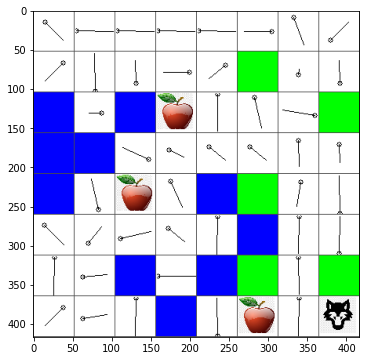

In [43]:
m.plot(Q)

## Verificando la Política

Dado que la Q-Table enumera la "atractividad" de cada acción en cada estado, es bastante sencillo usarla para definir la navegación eficiente en nuestro mundo. En el caso más simple, podemos simplemente seleccionar la acción que corresponde al valor más alto en la Q-Table:


In [13]:
# code block 9

2

Si pruebas el código anterior varias veces, es posible que notes que a veces simplemente se "queda colgado", y necesitas presionar el botón de DETENER en el cuaderno para interrumpirlo.

> **Tarea 1:** Modifica la función `walk` para limitar la longitud máxima del camino a un cierto número de pasos (por ejemplo, 100), y observa cómo el código anterior devuelve este valor de vez en cuando.

> **Tarea 2:** Modifica la función `walk` para que no regrese a los lugares donde ya ha estado previamente. Esto evitará que `walk` entre en bucles, sin embargo, el agente aún puede quedar "atrapado" en una ubicación de la que no pueda escapar.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


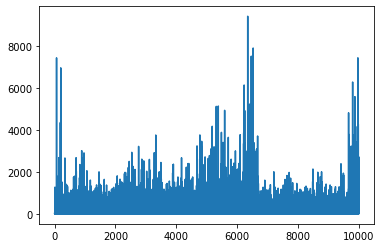

In [57]:
plt.plot(lpath)

## Ejercicio
## Un mundo más realista de Pedro y el lobo



---

**Descargo de responsabilidad**:  
Este documento ha sido traducido utilizando el servicio de traducción automática [Co-op Translator](https://github.com/Azure/co-op-translator). Si bien nos esforzamos por lograr precisión, tenga en cuenta que las traducciones automáticas pueden contener errores o imprecisiones. El documento original en su idioma nativo debe considerarse como la fuente autorizada. Para información crítica, se recomienda una traducción profesional realizada por humanos. No nos hacemos responsables de malentendidos o interpretaciones erróneas que puedan surgir del uso de esta traducción.
